# Assignment 2 - Report

In [9]:
# Import libraries
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
import datetime as dt

#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# 1. Data

In [7]:
    #request data
    start = dt.datetime(2014, 3, 23)
    end = dt.datetime(2017, 3, 23)

    #df_aapl = web.DataReader("AAPL", 'yahoo', start, end)['Adj Close']

    #df_msft = web.DataReader("MSFT", 'yahoo', start, end)['Adj Close']

    df_aapl=pd.read_csv('AAPL.csv', index_col=0, usecols=['Date','Adj Close'])
    
    df_msft=pd.read_csv('AAPL.csv', index_col=0, usecols=['Date','Adj Close'])

    df_data = pd.concat([df_aapl, df_msft], axis=1)
    df_data.columns = ['AAPL', 'MSFT']

    df_returns = df_data.pct_change().dropna()
    df_returns['PORT'] = df_returns.sum(axis=1)/2  
    
    fl_risk_free = 0.0172
    
    df_portfolio = df_data.sum(axis=1)/2 
    
    df_data.head()

AAPL       MSFT
Date                            
2014-03-24  72.098618  72.098618
2014-03-25  72.874161  72.874161
2014-03-26  72.177513  72.177513
2014-03-27  71.867294  71.867294
2014-03-28  71.787056  71.787056

I describe the data sets first and then I prepared the comparison of the two.
# 2 Daily returns for AAPL and MSFT

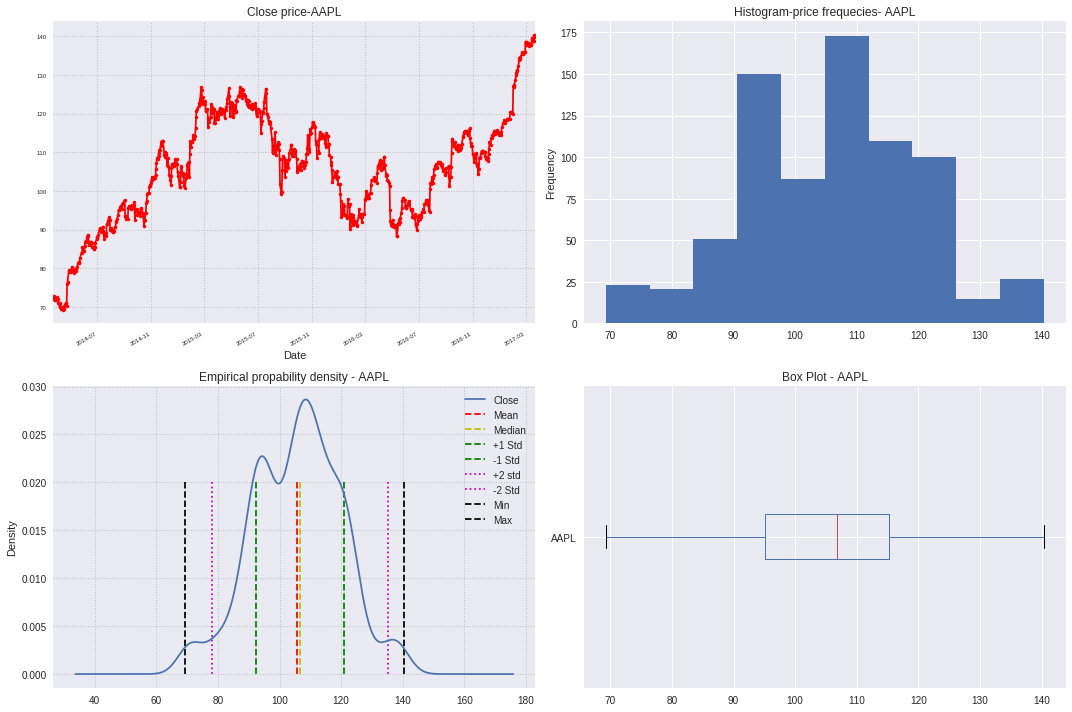


Descriptive statistics for AAPL are:
count    757.000000
mean     105.704788
std       14.278655
min       69.259811
25%       95.131729
50%      106.714546
75%      115.295570
max      140.327454
Name: AAPL, dtype: float64


In [13]:
# plot apple series
describe_series(df_data.AAPL, 'AAPL')

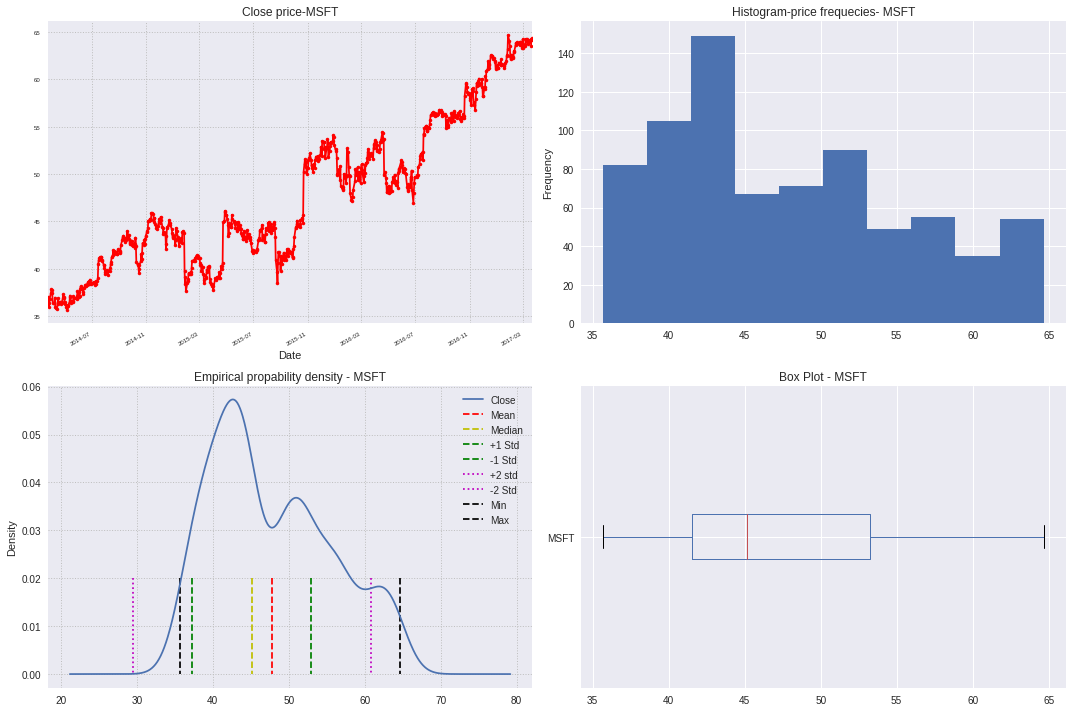


Descriptive statistics for MSFT are:
count    757.000000
mean      47.755372
std        7.822843
min       35.678623
25%       41.541840
50%       45.129169
75%       53.265953
max       64.666435
Name: MSFT, dtype: float64


In [15]:
describe_series(df_data.MSFT, 'MSFT')

In [8]:
compare_two_series(df_data, 'AAPL and MSFT')

NameError: name 'compare_two_series' is not defined

# 3 Expected return

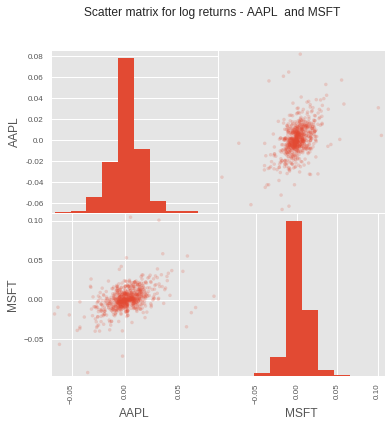

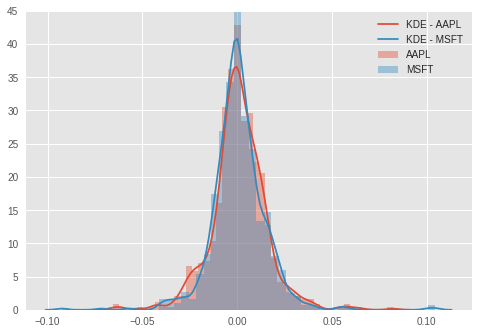


The covariance matrix is: 
          AAPL      MSFT
AAPL  0.000219  0.000098
MSFT  0.000098  0.000210

The descriptive statistics for AAPL  and MSFT returns are:

             AAPL        MSFT
count  756.000000  756.000000
mean     0.000985    0.000833
std      0.014794    0.014492
min     -0.065706   -0.092533
25%     -0.006049   -0.006184
50%      0.000711    0.000079
75%      0.008684    0.007381
max      0.081982    0.104522

The average annualised return is (assumes 252 days in a year):
AAPL    0.281685
MSFT    0.233473
dtype: float64


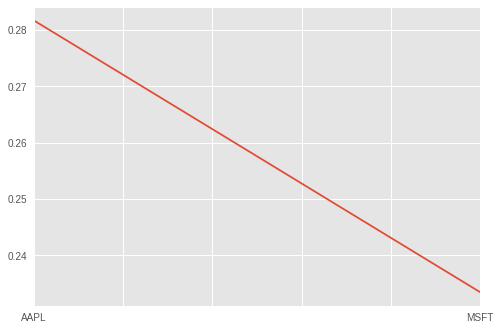

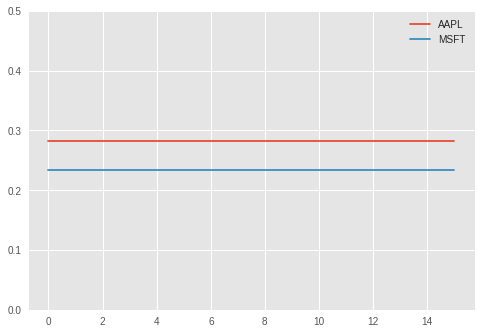

In [17]:
compare_return_two_sets(df_returns, 'AAPL  and MSFT')

The average return for the stocks is calculated above. I tried to plot the average returns however it is constant figure that doesn't change over time given the sample data set, so I used only straight lines to represent it.

We can use the below to calculate out the standard deviation of the portfolio. The standard deviation has the same unit scale as the original prices.

# 4 Standarad Deviation of the Portfolio

In [20]:
    # calculate the variance of the portfolio
    w = .5

    fl_var_portf = w ** 2 * df_data.iloc[:, 0].values.var() + \
        w ** 2 * df_data.iloc[:, 1].values.var() + \
        2 * w ** 2 * df_data.cov().iloc[0, 1]
        
    print("Standard deviation of the portfolio is:" + str(np.sqrt(fl_var_portf)))

Standard deviation of the portfolio is:9.5927646861


# 5 Risk Free
We calculate the excess average return on the portfolio in the below way. We can see that it is much higher than the assumed risk free rate. We can compare the returns in a graph as below.

In [5]:
    df_portfolio = df_data.sum(axis=1)/2

    fl_average_portoflio = ((df_portfolio.pct_change().dropna().mean() + 1) ** 252 - 1)

    fl_risk_free = 0.0172

    fl_portf_less_rf = fl_average_portoflio - fl_risk_free

    print("\nThe annualised portfolio return is: " + str(fl_average_portoflio))
    print("\nThe excess return of the equally weighted portfolio is: " + str(fl_portf_less_rf))


The annualised portfolio return is: 0.2836185497056203

The excess return of the equally weighted portfolio is: 0.2664185497056203


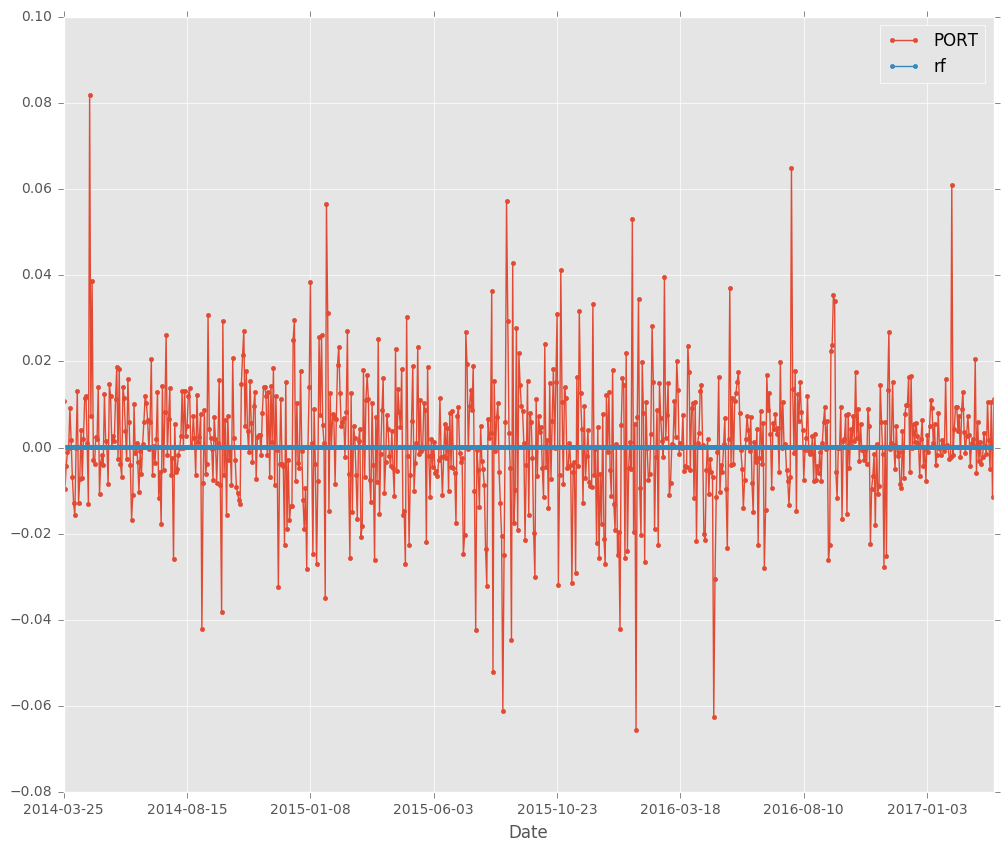

In [19]:
    # this what the return would be for 3 years
    fl_risk_free_3_year = ((fl_risk_free+1) ** 3) - 1
    
    # splitting the return for 3 years into daily returns
    fl_risk_free_daily = (fl_risk_free_3_year + 1) ** (1/len(df_returns)) - 1 
    
    # store the daily risk free into dataframe
    df_returns['rf'] = fl_risk_free_daily

    # plot
    df_returns[['PORT','rf']].plot(figsize=(12,10), marker='.')

We can see that the risk free rate has not volatility. This is by assumption of risk free rate.

# 6 Risk Profile Comparison
KPIs:


# Functions

In [3]:
def describe_series(pd_series, set_name):
    """
    Returns descriptive statistics for pandas series object

    :param pd_series: pd.S    import seaborn as snseries object - carries all data
    :param set_name: str - you can use this to set up custom name for plots
    :return: None
    """
    assert isinstance(pd_series, pd.Series), \
        "Pass in a 'pd.Series' object to 'pd_series' variable when calling 'describe_series' function"
    assert isinstance(set_name, str),\
        "Pass in a string variable to 'set_name' parameter when calling 'describe_series' function"

    np_series_values = pd_series.values

    line_size = .1
    if len(np_series_values) < 10:
        line_size = .25
    elif len(np_series_values) < 50:
        line_size = .20
    elif len(np_series_values) <= 100:
        line_size = .00125
    elif len(np_series_values) > 900:
        line_size = .0125
    elif len(np_series_values) > 400:
        line_size = .02
    elif len(np_series_values) > 150:
        line_size = .05
    elif len(np_series_values) > 120:
        line_size = .06
    elif len(np_series_values) > 100:
        line_size = .08

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    pd_series.plot(ax=axes[0, 0], title='Close price-' + str(set_name),  marker='.', color='r')
    axes[0, 0].tick_params(labelsize=6)
    axes[0, 0].grid(b=True, which='major', color='0.75', linestyle='dotted')

    pd_series.plot(ax=axes[0, 1], kind='hist', title='Histogram-price frequecies- ' + str(set_name))
    pd_series.plot.box(ax=axes[1, 1], vert=False, title='Box Plot - ' + str(set_name))
    pd_series.plot(ax=axes[1, 0], kind='density', title='Empirical propability density - ' + str(set_name),
                   linestyle='-')
    axes[1, 0].vlines(np_series_values.mean(), line_size, 0, color='r', linestyle='dashed', label='Mean')
    axes[1, 0].vlines(np.median(np_series_values), line_size, 0, color='y', linestyle='dashed', label='Median')
    axes[1, 0].vlines(np.median(np_series_values) + np.std(np_series_values), line_size, 0, color='g',
                      linestyle='dashed', label='+Std')
    axes[1, 0].vlines(np.median(np_series_values) - np.std(np_series_values), line_size, 0, color='g',
                      linestyle='dashed', label='-Std')
    axes[1, 0].vlines(np.median(np_series_values) + 2 * np.std(np_series_values), line_size, 0, color='m',
                      linestyle='dotted', label='+2Std')
    axes[1, 0].vlines(np.median(np_series_values) - 2 * np.std(np_series_values), line_size, 0, color='m',
                      linestyle='dotted', label='-2Std')
    axes[1, 0].vlines(np.min(np_series_values), line_size, 0, color='k', linestyle='dashed', label='Min')
    axes[1, 0].vlines(np.max(np_series_values), line_size, 0, color='k', linestyle='dashed', label='Min')
    axes[1, 0].grid(b=True, which='major', color='0.75', linestyle='dotted')
    axes[1, 0].legend(['Close', 'Mean', 'Median', '+1 Std', '-1 Std', '+2 std', '-2 Std', 'Min', 'Max'],
                      loc='best')

    plt.tight_layout()
    plt.show()

    del line_size, np_series_values
    print("\nDescriptive statistics for " + set_name + " are:")
    print(pd_series.describe())

    return None

In [4]:
def compare_two_series(pd_df_two_series=pd.DataFrame(), set_name=''):
    """
    Prints comparison of two series. Remember to order the the frame by oldest on the top.

    Prints:
        - series over time - log scale and actual
        - returns - log scale and actual
        - cumulative returns - log scale and actual    import seaborn as sns
        - scatter matrix for the series

    :param pd_df_two_series: Data Frame with two time series
    :param set_name: Title for the plots
    :return: None but plots the comparison
    """

    assert isinstance(pd_df_two_series, pd.DataFrame), "Pass in a 'pd.DataFrame' object to 'pd_df_two_series' variable when calling 'compare_two_series' function"
    assert isinstance(set_name, str), "Pass in a string variable to 'set_name' parameter when calling 'describe_series' function"

    matplotlib.style.use('ggplot')

    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    pd_df_two_series.plot(ax=axes[0, 0], title='Actual data - ' + set_name)

    np.log(pd_df_two_series).plot(ax=axes[0, 1], title='Actual data on log scale - ' + set_name,)

    df_returns = pd_df_two_series.pct_change().dropna()

    df_returns.plot(ax=axes[1, 0], title='Returns - ' + set_name, marker='.')
    df_returns += 1
    df_returns.cumprod().plot(ax=axes[1, 1], title='Cumulative returns - ' + set_name)

    df_log_returns = np.log(pd_df_two_series).diff()[1:]

    df_log_returns.plot(ax=axes[2, 0], title='Log returns - ' + set_name, marker='.')
    df_log_returns.cumsum().plot(ax=axes[2, 1], title='Log cumulative returns - ' + set_name)

    plt.tight_layout()
    plt.show()

    return None

In [5]:
def compare_return_two_sets(pd_df_return_set=pd.DataFrame(), set_name=''):
    """
    This create 4 plots
        - two scatter matrices using Pandas plotting functionality
        - two distribution comparisons using Seaborn package
    It will need tweaking for reuse
    It uses sequential plotting as in Matplotlib

    :param pd_df_return_set: pd.DataFrame that carries two columns of returns
    :param set_name:
    :return: None but generates plots sequentiallyix
    """

    # create the scatter_matrix
    pd.plotting.scatter_matrix(pd_df_return_set, alpha=.2, figsize=(6, 6), diagonal='hist')
    plt.suptitle('Scatter matrix for log returns - ' + set_name)
    plt.draw()

    plt.figure()
    sns.distplot(pd_df_return_set[pd_df_return_set.columns[0]].values,
                 kde_kws={"label": "KDE - " + pd_df_return_set.columns[0]},
                 hist_kws={"label": pd_df_return_set.columns[0]}
                 )

    sns.distplot(pd_df_return_set[pd_df_return_set.columns[1]].values,
                 kde_kws={"label": "KDE - " + pd_df_return_set.columns[1]},
                 hist_kws={"label": pd_df_return_set.columns[1]}
                 )
    plt.draw()
    plt.show()

    print("\nThe covariance matrix is: ")
    print(pd_df_return_set.cov())

    print("\nThe descriptive statistics for " + set_name + " returns are:\n")
    print(pd_df_return_set.describe())

    df_average_return = ((pd_df_return_set.mean() + 1) ** 252 - 1)

    print("\nThe average annualised return is (assumes 252 days in a year):")
    print((df_average_return))

    plt.figure()
    df_average_return.plot()
    plt.show()

    x = np.linspace(0, 15, 16)
    plt.figure()
    axes = plt.gca()
    axes.set_ylim([0, 0.5])
    plt.plot(x, [df_average_return.values[0].tolist()] * 16, label=pd_df_return_set.columns[0])
    plt.plot(x, [df_average_return.values[1].tolist()] * 16, label=pd_df_return_set.columns[1])
    plt.legend()
    plt.show()

    return None